## run pip install -e in root

In [2]:

from src.data import preprocessing as prep
data_list,label_list = prep.loaddata()

### if that doesn't work, try the code below 

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import glob

def loaddata():

    file_paths = '../data/raw/'
    filenames = glob.glob(file_paths+"*[0-9].csv",recursive = True)
    list_of_dfs = [pd.read_csv(filename) for filename in filenames]
    data_list = []
    for dataframe, filename in zip(list_of_dfs, filenames):
        dataframe=dataframe.drop(columns=['acc_x','acc_y','acc_z','roll', 'pitch', 'yaw','event'])
        data_datetime = dataframe.copy()
        data_datetime['#timestamp']=data_datetime['#timestamp'] / 1e3
        data_datetime['#timestamp']=data_datetime['#timestamp'].apply(lambda x: pd.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f'))
        data_list.append(data_datetime)
    labelfilenames = glob.glob(file_paths+"*.txt",recursive = True)
    list_of_labeldfs = [pd.read_csv(filename, sep=";") for filename in labelfilenames]
    label_list = []
    for dataframe, filename in zip(list_of_labeldfs, labelfilenames):
        data_label=dataframe[['Time', 'anchor:status','trl', 'nosezone.touches', 'mouthzone.touches', 'eyezone.right eye', 'eyezone.left eye']].copy()
      data_label.columns = ['timeAfterStart','anchor', 'isTouch', 'nose', 'mouth', 'rightEye', 'leftEye']
      label_list.append(data_label)
    return data_list, label_list

In [3]:
data_list,label_list = loaddata()

# plot the data to check anchor label



In [3]:
data= data_list[0]
data.head()

,#timestamp,left1,left2,right2,right2.1
0,2020-06-11 21:50:05.020000,131,-38,176,-7
1,2020-06-11 21:50:05.042000,129,-43,178,-8
2,2020-06-11 21:50:05.057000,131,-39,186,1
3,2020-06-11 21:50:05.079000,112,-64,165,-29
4,2020-06-11 21:50:05.102000,108,-52,159,-16


In [4]:
data_l1=data['left1']
data_r1=data['right2']

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


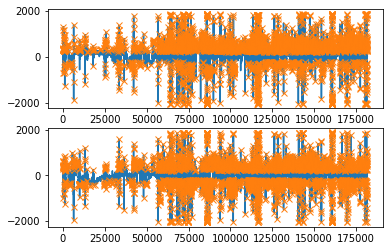

In [133]:
from scipy.signal import argrelextrema,find_peaks_cwt
peaks_l1, _ = find_peaks(data_l1.abs(), prominence=(200,None),width=1)
peaks_r1, _ = find_peaks(data_r1.abs(), prominence=(200,None),width=1)
plt.subplot(211)
plt.plot(data_l1)
plt.plot(peaks_l1, data_l1[peaks_l1], "x")
plt.subplot(212)
plt.plot(data_r1)
plt.plot(peaks_r1, data_r1[peaks_r1], "x")

([<matplotlib.axis.XTick at 0x7f24c41f5c18>,
 <a list of 2 Text major ticklabel objects>)

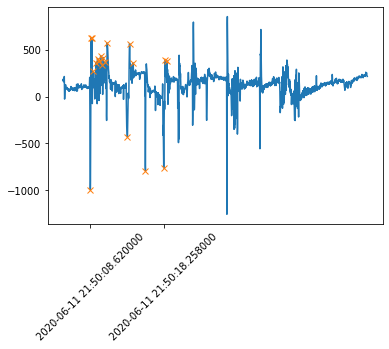

In [135]:
import matplotlib
dates = data['#timestamp']
plt.plot(dates.head(2000),data_r1.head(2000))
plt.gca().set_xticks([])
plt.plot(peaks_r1[:19], data_r1[peaks_r1[:19]], "x")
plt.xticks([dates[peaks_r1[0]],dates[peaks_r1[16]]],rotation=45)

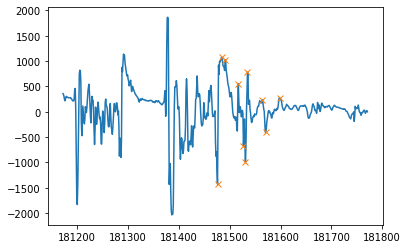

In [136]:
plt.plot(data_r1.tail(600))
plt.plot(peaks_r1[-10:], data_r1[peaks_r1[-10:]], "x")

([<matplotlib.axis.XTick at 0x7f24c3f4be48>,
 <a list of 2 Text major ticklabel objects>)

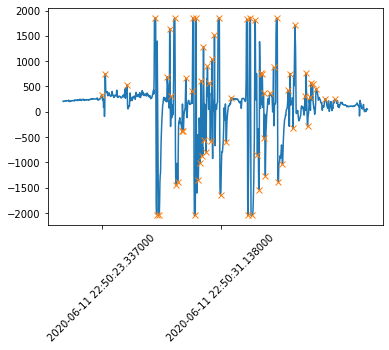

In [142]:

plt.plot(dates.tail(1000),data_l1.tail(1000))
plt.gca().set_xticks([])
plt.plot(dates[peaks_l1[-65:]], data_l1[peaks_l1[-65:]], "x")
plt.xticks([dates[peaks_l1[-65]], dates[peaks_l1[-33]]],rotation=45)


In [10]:
dlabel= label_list[0]
dlabel.head()

,timeAfterStart,anchor,isTouch,nose,mouth,rightEye,leftEye
0,0.00,-1000,-1000,-1000,-1000,-1000,-1000
1,0.04,-1000,-1000,-1000,-1000,-1000,-1000
2,0.08,-1000,-1000,-1000,-1000,-1000,-1000
3,0.12,-1000,-1000,-1000,-1000,-1000,-1000
4,0.16,-1000,-1000,-1000,-1000,-1000,-1000


In [11]:
frist_touch =  dlabel[dlabel.anchor==1].timeAfterStart.head(1).item()
frist_touch

2.52

In [116]:
last_touch =  dlabel[dlabel.anchor==1].timeAfterStart.tail(1).item()
last_touch

14.12

In [20]:
frist_touchend =  dlabel[dlabel.anchor==2].timeAfterStart.head(1).item()
frist_touchend

3620.56

In [103]:
last_touchend =  dlabel[dlabel.anchor==2].timeAfterStart.tail(1).item()
last_touchend

3628.64

In [15]:
import glob
file_paths = '../data/raw/'
labelfilenames = glob.glob(file_paths+"*.txt",recursive = True)
labelfilenames[0]

'../data/raw/20200611_21_50_01-annotation-frame-by-frame.txt'

In [52]:
import re
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
text = re.findall('[0-9]+_[0-9]+_[0-9]+_[0-9]+', labelfilenames[0])

starttime=datetime.strptime(text[0],'%Y%m%d_%H_%M_%S')
starttime

datetime.datetime(2020, 6, 11, 21, 50, 1)

In [39]:
span = timedelta(0,seconds=frist_touch)
print(span)
startstamp = starttime+span
startstamp.strftime('%Y-%m-%d %H:%M:%S.%f')


0:00:02.520000


'2020-06-11 21:50:03.520000'

In [122]:
span = timedelta(0,seconds=last_touch)
print(span)
startstamp = starttime+span
startstamp.strftime('%Y-%m-%d %H:%M:%S.%f')

0:00:14.120000


'2020-06-11 21:50:15.120000'

In [40]:
spanend = timedelta(0,seconds=frist_touchend)
endstamp = starttime+spanend
endstamp.strftime('%Y-%m-%d %H:%M:%S.%f')

'2020-06-11 22:50:21.560000'

In [104]:
spanend = timedelta(0,seconds=last_touchend)
endstamp = starttime+spanend
endstamp.strftime('%Y-%m-%d %H:%M:%S.%f')

'2020-06-11 22:50:29.640000'

In [36]:
duration=frist_touchend-frist_touch
dur=timedelta(0,seconds = -duration)
endtime=datetime.strptime(dates[peaks_r1[-35]],'%Y-%m-%d %H:%M:%S.%f')
adj_startstamp=endtime+dur
str(adj_startstamp)

'2020-06-11 21:50:05.538000'